# Python program to simulate Sine Wave Generation 
## The program plots the Frequency Spectrum and Time domain display of the Signal

* Allow matplotlib to NOT use LATEX (**NOTE: Latex is creating problem and crash when plotting**)

In [1]:
from matplotlib import rc
rc("text", usetex=False)

* Import the python modules required 


In [2]:
import math 
import numpy
from matplotlib import pyplot as plt

* Load the settings for simulating the Simulation

In [3]:
SampleRate = 1e9                # Hz; Sample Rate
ExperimentTime = 200e-9         # sec; Time for which the experiment is performed
N = round(ExperimentTime*SampleRate)  
                                # Number of Sample to generate
plotDPI = 120                   # DPI settings for the plot

* Set settings for the Sine wave to generate

In [4]:
Amplitude = 0.75               # Signal amplitude
Frequency = 50e6               # Hz; Frequency of the Sine Wave
D_Frequency= Frequency/SampleRate # Digital Domain frequency (0, SampleRate/2)

* Generate the Time Domain Samples

In [5]:
index = numpy.linspace(0, N, N+1)
listIQ = list()
for index1 in index:
    phasor = 2*math.pi*D_Frequency *index1
    I = Amplitude * math.cos(phasor)
    Q = Amplitude * math.sin(phasor)
    listIQ.append(complex(I, Q))
IQ = numpy.asarray(listIQ)

* Plot the Signal on Time Domain Plot

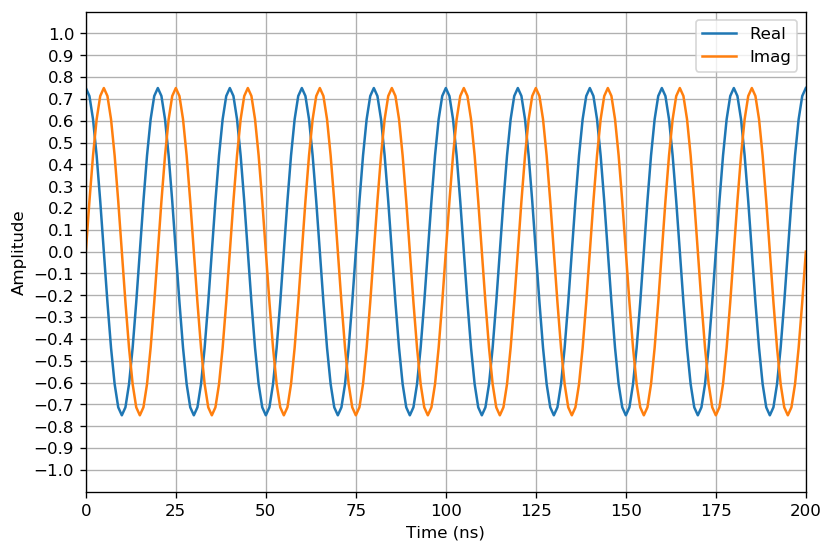

In [6]:
timeIndex = index * 10**9/SampleRate

fig = plt.figure(dpi=plotDPI)
ax = fig.add_axes([0,0,1,1])
ax.plot(timeIndex, IQ.real, label="Real")
ax.plot(timeIndex, IQ.imag, label="Imag")
ax.legend()

ax.set_xlabel("Time (ns)")
ax.set_ylabel("Amplitude")

ax.grid(True)

ax.set_xlim(0, N/SampleRate * 10**9)
ax.set_ylim([-1.1,1.1])

ax.set_yticks(numpy.linspace(-1,1, 21));

* Extract the frequency information (spectral information)

In [7]:
freqPower = numpy.fft.fft(IQ)
freqPower = numpy.fft.fftshift(freqPower)
freqPower = numpy.power(numpy.absolute(freqPower),2)
freqPowerSum = numpy.sum(freqPower)
freqPower = freqPower/freqPowerSum

freqIndex = (index*SampleRate/N) - SampleRate/2
freqIndex *= 10**-6

* Plot the spectrum using the spectral information obtained above

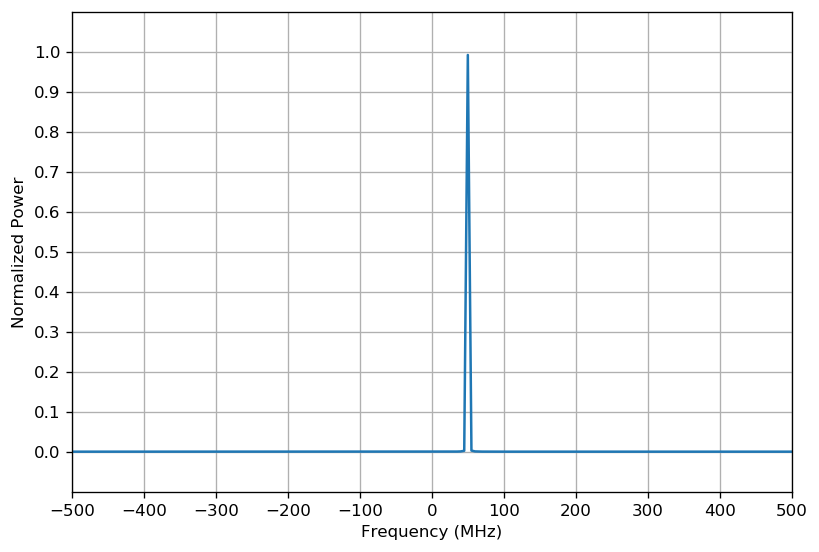

In [8]:
fig= plt.figure(dpi = plotDPI)
ax = fig.add_axes([0,0,1,1])
ax.plot(freqIndex, freqPower.real)
ax.set_xlabel("Frequency (MHz)")
ax.set_ylabel("Normalized Power")
ax.grid(True)
ax.set_xlim(-SampleRate/2*10**-6, +SampleRate/2*10**-6)
ax.set_ylim([-0.1,1.1])
ax.set_xticks(numpy.linspace(-SampleRate/2*10**-6, +SampleRate/2*10**-6, 11));
ax.set_yticks(numpy.linspace(0, 1, 11));